In [1]:
import os

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# from ipywidgets import interact, IntSlider, FloatSlider, fixed
# from astropy.modeling.models import Gaussian1D

import lightkurve as lk

# import seaborn as sns

# # import echelle
# from astropy.timeseries import LombScargle
# from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

/Users/ccra8514/anaconda3/envs/lightkurve_take2/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/ccra8514/.lightkurve/cache. Please move all the files in the legacy directory /Users/ccra8514/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 17
plt.rcParams['axes.labelsize'] = 20

In [3]:
lc_echelle = lk.search_lightcurve('KIC 2158410')#, author='Kepler',exptime=1800).download_all().stitch()
lc_echelle

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr002158410,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr002158410,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr002158410,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr002158410,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr002158410,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr002158410,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr002158410,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr002158410,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr002158410,0.0


In [4]:
lc_echelle = lk.search_lightcurve('KIC 2158410', author='Kepler', exptime=1800).download_all().stitch()
lc_echelle

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.53928604737303,1.0004836e+00,5.6388533e-05,0,1.133627e-03,488.31858,808.17961,568,2.8472434e+05,1.5653202e+01,5.1590645e+03,1.5438929e+00,2.8569719e+05,1.6102259e+01,0,———,———,———,———,488.31858,7.5165219e-05,808.17961,8.9874127e-05,7.5876871e-03,8.9401770e-03
120.55972067834955,9.9981099e-01,5.6323082e-05,0,1.134658e-03,488.31848,808.17921,569,2.8467753e+05,1.5650959e+01,5.1626763e+03,1.5423319e+00,2.8550512e+05,1.6083569e+01,0,———,———,———,———,488.31848,7.5179996e-05,808.17921,8.9896137e-05,7.0560775e-03,8.2555925e-03
120.5801552092089,9.9981683e-01,5.6278619e-05,0,1.135689e-03,488.31793,808.17934,570,2.8464994e+05,1.5650210e+01,5.1535659e+03,1.5411898e+00,2.8550678e+05,1.6070871e+01,0,———,———,———,———,488.31793,7.5195916e-05,808.17934,8.9904745e-05,6.4049093e-03,8.3068106e-03
120.60058994006249,9.9976218e-01,5.6374072e-05,0,1.136720e-03,488.31750,808.17951,571,2.8462078e+05,1.5649992e+01,5.1531646e+03,1.5454035e+00,2.8549119e+05,1.6098129e+01,0,———,———,———,———,488.31750,7.5193857e-05,808.17951,8.9909576e-05,5.8486587e-03,8.4585184e-03
120.6210245709226,9.9963832e-01,5.6264838e-05,0,1.137751e-03,488.31687,808.17952,572,2.8454222e+05,1.5648359e+01,5.1584214e+03,1.5422080e+00,2.8545581e+05,1.6066936e+01,0,———,———,———,———,488.31687,7.5226948e-05,808.17952,8.9940120e-05,4.8728269e-03,8.0608279e-03
120.64145910166553,9.9948478e-01,5.6358444e-05,0,1.138782e-03,488.31648,808.17990,573,2.8448622e+05,1.5647104e+01,5.1527085e+03,1.5426339e+00,2.8541197e+05,1.6093666e+01,0,———,———,———,———,488.31648,7.5231226e-05,808.17990,8.9941219e-05,4.6380484e-03,8.6375959e-03
120.66189373240195,9.9938303e-01,5.6347882e-05,0,1.139812e-03,488.31655,808.17934,574,2.8442459e+05,1.5645944e+01,5.1513901e+03,1.5428028e+00,2.8538291e+05,1.6090651e+01,0,———,———,———,———,488.31655,7.5252770e-05,808.17934,8.9965455e-05,4.1941269e-03,8.0341510e-03
120.68232846302999,9.9957758e-01,5.6372490e-05,0,1.140843e-03,488.31636,808.17952,575,2.8444109e+05,1.5646201e+01,5.1570396e+03,1.5423027e+00,2.8543847e+05,1.6097677e+01,0,———,———,———,———,488.31636,7.5248994e-05,808.17952,8.9956004e-05,4.1079121e-03,8.0907689e-03


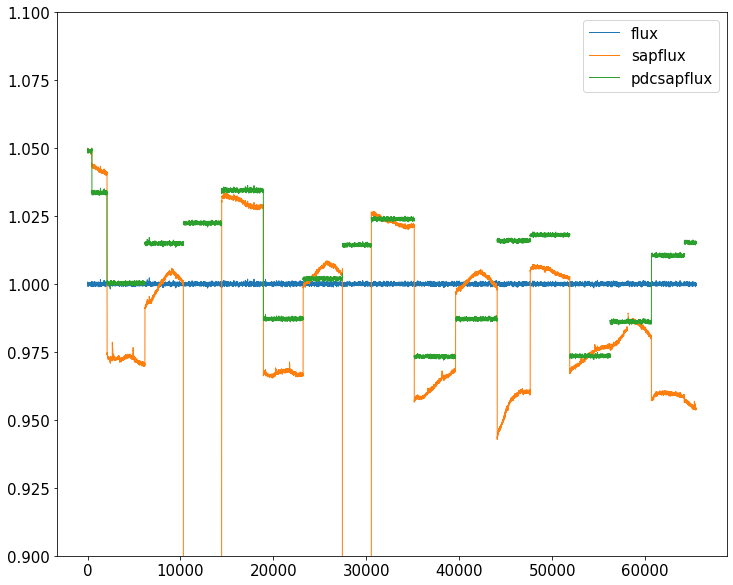

In [23]:
plt.figure(figsize=(12,10))
plt.plot(lc_echelle.flux,label='flux')
plt.plot(lc_echelle.sap_flux/np.max(lc_echelle.sap_flux)+0.05,label='sapflux')
plt.plot(lc_echelle.pdcsap_flux/np.max(lc_echelle.pdcsap_flux)+0.05,label='pdcsapflux')
plt.ylim(0.9,1.1)
# plt.ylim(0.99,1.01)
# plt.xlim(0,8000)
plt.legend()
plt.show()